numpy support Multi-demensional arrays (N, dimensional, ND)  - raw numbers  
Xarray include labels which encode information about how the array values map to locations in space, time, etc  

- Apply operations oer dimensions by name `x.sum('time')`  
- Select values by lable (or logical location) lnstead of integer location: `x.loc["2014-01-01"]` or `x.sel(time="2014-0101")`  
- Mathmatical opertaton(e.g., `x-y`) verctorize across multiple dimensions(array broadcasting) based on dimension names, not spae.  
- Easily use the split-apply-combine paradigm with `groupby` `x.groupby("time.dayofyear").mean()`  
- Database-like alignment based on coordinate labels that smoothly handles missing values: `x,y = xr.align(x,y, join="outer")`  
- Keep track of arbitary metadata in the form of a Python dictionay `x.attrs`  
- use dimension names instead of axis labels `dim="time"` instead of `axis=0`  


Data structures  
- `DataArray`: implementation of labeled, N-dimensional array. Name from the Fernando Perez's dataarray project  
- `Dataset`: a multi-dimensional, in-memory arrary database. dict-like container of `DataArray` objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the `pandas.DataFrame`

** It's a dictionary therefore, possible to pulling out array by names = Wenming told same thing!!!!! **

This data model is borrowed from the `netCDF` file format.

# Create a DataArray  
https://docs.xarray.dev/en/stable/getting-started-guide/quick-overview.html#indexing

In [ ]:
import numpy as np
import packaging
import pandas as pd
import xarray as xr

In [ ]:
 # 2D array, assigned the name x and y, associated two coordinat labes 10 and 20
 data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})


In [ ]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[-1.0124925 ,  0.33360803, -1.43730032],
       [ 0.49160363, -1.00934852,  1.23768928]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [ ]:
xr.DataArray(pd.Series(range(3), index=list("abc"), name="foo"))

<xarray.DataArray 'foo' (dim_0: 3)>
array([0, 1, 2])
Coordinates:
  * dim_0    (dim_0) object 'a' 'b' 'c'

In [ ]:
data.values

array([[ 1.39850826,  1.78022165, -0.62014659],
       [-2.4588713 ,  0.73123367,  0.66309897]])

In [ ]:
data.dims

('x', 'y')

In [ ]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [ ]:
data.attrs

{}

# Indexing

In [ ]:
# positional and by integer label, like numpy
data[0,:]

<xarray.DataArray (y: 3)>
array([ 1.39850826,  1.78022165, -0.62014659])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [ ]:
# loc or "location": like pandas
data.loc[10]

<xarray.DataArray (y: 3)>
array([ 1.39850826,  1.78022165, -0.62014659])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [ ]:
# isel or "integer select": by dimension name and integer label
data.isel(x=0)

<xarray.DataArray (y: 3)>
array([ 1.39850826,  1.78022165, -0.62014659])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [ ]:
# sel or "select": by dimension name and coordinate label
data.sel(x=10)

<xarray.DataArray (y: 3)>
array([ 1.39850826,  1.78022165, -0.62014659])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

# Attributes  
set metadata attributes is a good idea.  
`data.attr['long_name'] and `data.attr['units'] since xarray will use these, if present, to automatically label your plots. The special names were chosen following the NetCDF Climate and Forecast(CF) Metadata Conventions. `attrs` is just a python dictionay, so you can assign anything you with.

In [ ]:
data.attrs["long_name"] = 'randon velocity'
data.attrs["units"] = "metres/sec"
data.attrs["description"] = "a random variable created as an example"
data.attrs["random_attributes"] = 123

In [ ]:
data.attrs

{'long_name': 'randon velocity',
 'units': 'metres/sec',
 'description': 'a random variable created as an example',
 'random_attributes': 123}

# Computation  
similar to numpy ndarrays

```
# This is formatted as code
```



In [ ]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[11.39850826, 11.78022165,  9.37985341],
       [ 7.5411287 , 10.73123367, 10.66309897]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [ ]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.98519509,  0.97815055, -0.58115446],
       [-0.63090674,  0.66778843,  0.61556207]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:          randon velocity
    units:              metres/sec
    description:        a random variable created as an example
    random_attributes:  123

In [ ]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[ 1.39850826, -2.4588713 ],
       [ 1.78022165,  0.73123367],
       [-0.62014659,  0.66309897]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:          randon velocity
    units:              metres/sec
    description:        a random variable created as an example
    random_attributes:  123

In [ ]:
data.sum()

<xarray.DataArray ()>
array(1.49404467)

In [ ]:
data.mean(dim="x")

<xarray.DataArray (y: 3)>
array([-0.53018152,  1.25572766,  0.02147619])
Dimensions without coordinates: y

In [ ]:
# ** can't understand this meaning  **
# Arithmetic operations broadcast based on dimension name. This means you don't need to insert dummty dimensions for alignment
# alignment when and why example?

In [ ]:
#a = xr.DataArray(np.random.randn(3), [data.coords["yellow"]])
# .coords how to use it can't not put anyother text rather than y
a = xr.DataArray(np.random.randn(3), [data.coords["y"]])
b = xr.DataArray(np.random.rand(4), dims="zibra")

In [ ]:
a

<xarray.DataArray (y: 3)>
array([-1.25346262, -0.69228016,  1.1934689 ])
Coordinates:
  * y        (y) int64 0 1 2

In [ ]:
b

<xarray.DataArray (zibra: 4)>
array([0.7456559 , 0.65610064, 0.45649453, 0.70367692])
Dimensions without coordinates: zibra

In [ ]:
# why a+ b generates the following result?
a + b

<xarray.DataArray (y: 3, zibra: 4)>
array([[-0.50780672, -0.59736198, -0.79696809, -0.5497857 ],
       [ 0.05337574, -0.03617952, -0.23578563,  0.01139676],
       [ 1.9391248 ,  1.84956954,  1.64996343,  1.89714582]])
Coordinates:
  * y        (y) int64 0 1 2
Dimensions without coordinates: zibra

In [ ]:
data - data.T

<xarray.DataArray (x: 2, y: 3)>
array([[0., 0., 0.],
       [0., 0., 0.]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [ ]:
data[:-1] - data[:1]

<xarray.DataArray (x: 1, y: 3)>
array([[0., 0., 0.]])
Coordinates:
  * x        (x) int64 10
Dimensions without coordinates: y

# GroupBy

In [ ]:
labels = xr.DataArray(["E", "F", "E"],[data.coords["y"]], name="lables")

In [ ]:
labels

<xarray.DataArray 'lables' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [ ]:
data.groupby(labels).mean("y")

<xarray.DataArray (x: 2, lables: 2)>
array([[ 0.38918084,  1.78022165],
       [-0.89788617,  0.73123367]])
Coordinates:
  * x        (x) int64 10 20
  * lables   (lables) object 'E' 'F'
Attributes:
    long_name:          randon velocity
    units:              metres/sec
    description:        a random variable created as an example
    random_attributes:  123

In [ ]:
data.groupby(labels).map(lambda x:x - x.min())

<xarray.DataArray (x: 2, y: 3)>
array([[3.85737957, 1.04898798, 1.83872472],
       [0.        , 0.        , 3.12197027]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

# Plotting  
it generate a plot, I didn't call Metplotlib module  

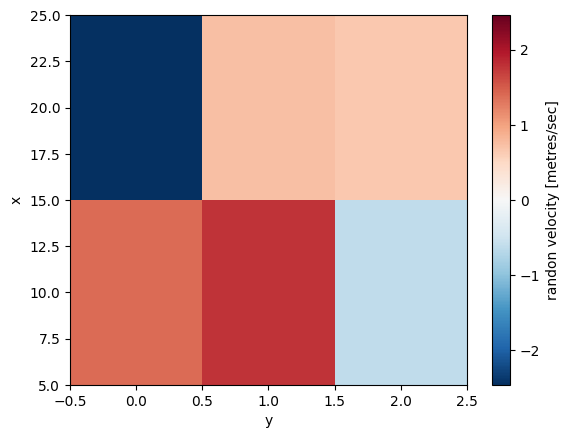

In [ ]:
data.plot()

# pandas   
xarray objects can converted to pandas object  
`to_series()`, `to_dataframe()`, `to_xarray()`  


In [ ]:
series = data.to_series()

In [ ]:
series

x   y
10  0    1.398508
    1    1.780222
    2   -0.620147
20  0   -2.458871
    1    0.731234
    2    0.663099
dtype: float64

In [ ]:
df = data.to_dataframe(name="pd_column")
# The name of a Series within a DataFrame is its column name
df

pd_column
x  y           
10 0   1.398508
   1   1.780222
   2  -0.620147
20 0  -2.458871
   1   0.731234
   2   0.663099

In [ ]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[ 1.39850826,  1.78022165, -0.62014659],
       [-2.4588713 ,  0.73123367,  0.66309897]])
Coordinates:
  * x        (x) int64 10 20
  * y        (y) int64 0 1 2

# Datasets  
dict-like container of aligned `DataArray` objects.  

In [ ]:
ds = xr.Dataset(dict(foo=data, bar=("x", [1,2]), baz=np.pi))
# foo is indentical to `data` created earlier, `bar` is one dimentional with single dimension `x` and
# associated values 1 and 1, `bas` is a scalar not associated with any dimention in ds.

In [ ]:
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 1.399 1.78 -0.6201 -2.459 0.7312 0.6631
    bar      (x) int64 1 2
    baz      float64 3.142

In [ ]:
df2 = ds.to_dataframe()
df2

foo  bar       baz
x  y                         
10 0  1.398508    1  3.141593
   1  1.780222    1  3.141593
   2 -0.620147    1  3.141593
20 0 -2.458871    2  3.141593
   1  0.731234    2  3.141593
   2  0.663099    2  3.141593

In [ ]:
ds.foo #ds["foo"]

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 1.39850826,  1.78022165, -0.62014659],
       [-2.4588713 ,  0.73123367,  0.66309897]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:          randon velocity
    units:              metres/sec
    description:        a random variable created as an example
    random_attributes:  123

In [ ]:
ds.bar.sel(x=10)
# when creating `ds` xarray automatically aligns `bar` with `DataArray` `foo`
# they share the same coordinate syste so that `ds.bar['x'] == `ds.foo['x'] ==ds ['x']
# Consequently, the following works without explicitly specifiying the coordinate `x` when
# creating `ds['bar']`

# you can do almost everything you can do with `DataArray` object with `Dataset`objects  v
# (including indexing and arithmetic) if you prefer to work with multiple variable at once

<xarray.DataArray 'bar' ()>
array(1)
Coordinates:
    x        int64 10

# Read & write netCDF files  
NetCDF is the recommended file format for xarray objects. Users from the geosciencs will recognize that the `Dataset` data model looks very similar to a netCDF file.  

you can directly read and write xarray objects to disk using `to_netcdf()`, `open_dataset()`, `open_dataarray()`  

In [ ]:
ds.to_netcdf('example.nc')

In [ ]:
reopened = xr.open_dataset("example.nc")

In [ ]:
reopened

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int32 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int32 ...
    baz      float64 ...